#### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

### Data Preprocessing

#### 1) Handling Null

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2) Handling Duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### 3) Check data types

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

Pregnancies - 17
Glucose - 136
BloodPressure - 47
SkinThickness - 51
Insulin - 186
BMI - 248
DiabetesPedigreeFunction - 517
Age - 52
Outcome - 2


In [10]:
cat_cols = ['Outcome']
cont_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

### Bivariate Analysis

#### Countplot

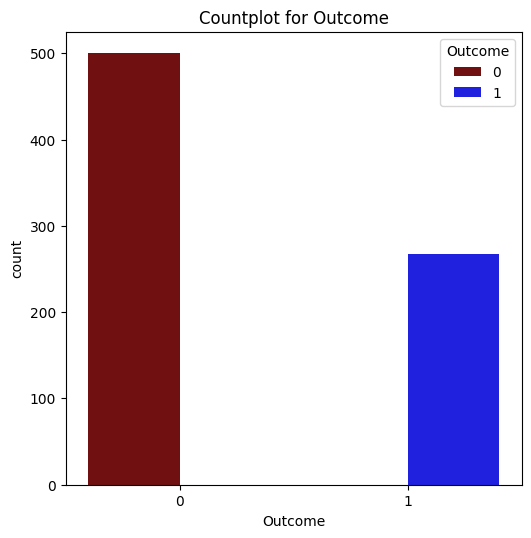

In [14]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat_cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[cat_cols[i]],hue= df['Outcome'],palette=['maroon','blue'])
    
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

#### Boxplot - cont vs target

In [15]:
print(cont_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


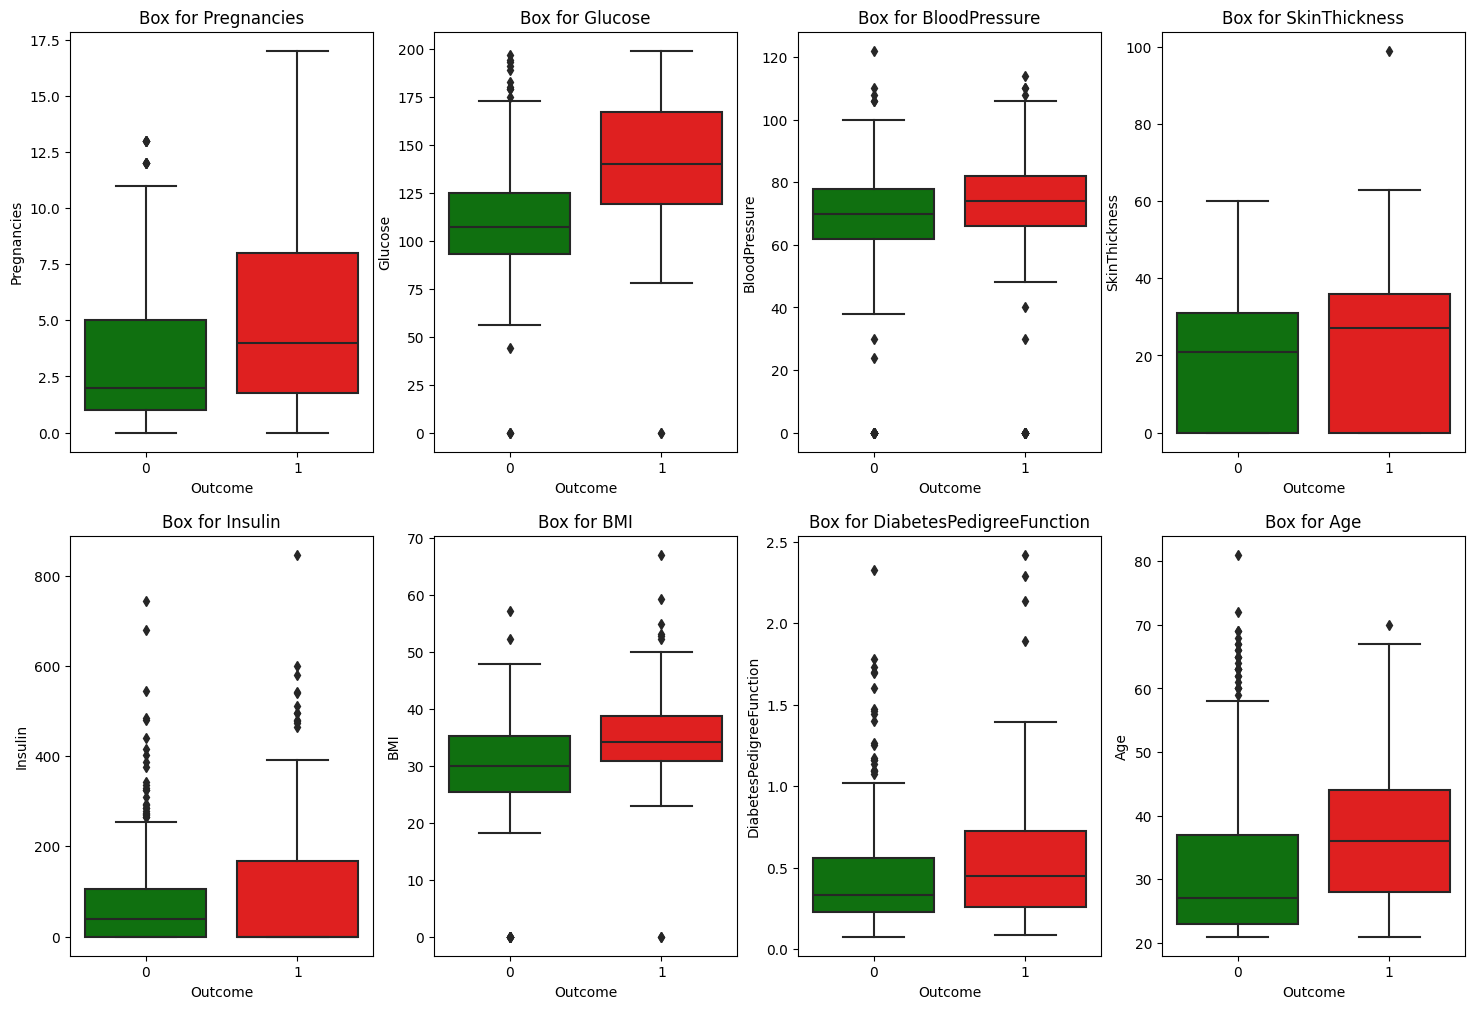

In [23]:
plt.figure(figsize=(18,12))
for i in range(0,len(cont_cols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[cont_cols[i]],x=df['Outcome'],palette=['green','red'])
    plt.title(f'Box for {cont_cols[i]}')
plt.show()

### Inferences:
1. Some people dont have diabetes but their insulin levels are extremely high as observed by outliers.
2. Diebetes Pedigree Function also is very imbalanced and scattered for non diabetic women.
3. Typically beyond 55 diabetes is common among women but some outliers do lie in non diabetic zone.
4. Women with less than 5 pregnancies, predominently ones with only 2 preganancies are less likely to get diabetes and as number of pregnancies increases the chances of diabetes increases.
5. As skin tickness increases that is as fat increases the likeliness of diabetes increases.
6. Women with high BMI are highly likely to get diabetes.

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
r1 = df.groupby('Outcome')[['Age','Glucose','Insulin','BMI']].agg(['min','max','mean'])
r1

Age                Glucose                  Insulin                   \
        min max       mean     min  max        mean     min  max        mean   
Outcome                                                                        
0        21  81  31.190000       0  197  109.980000       0  744   68.792000   
1        21  70  37.067164       0  199  141.257463       0  846  100.335821   

         BMI                   
         min   max       mean  
Outcome                        
0        0.0  57.3  30.304200  
1        0.0  67.1  35.142537

In [25]:
cont_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [27]:
r2 = df.groupby('Outcome').agg({'Age':['mean','median'],
                              'DiabetesPedigreeFunction':['min','max'],
                              'Pregnancies':['min','max','mean']})
r2

Age        DiabetesPedigreeFunction        Pregnancies      \
              mean median                      min    max         min max   
Outcome                                                                     
0        31.190000   27.0                    0.078  2.329           0  13   
1        37.067164   36.0                    0.088  2.420           0  17   

                   
             mean  
Outcome            
0        3.298000  
1        4.865672

#### Find Age_bins based mean cholestrol for each target. use Pivot_table

In [28]:
df['Age'].describe()  #where have we found age bins based mean????

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [29]:
# Binning
df['Age_bins']  = pd.cut(df['Age'],bins=list(range(25,85,5)))
df['Age_bins'].value_counts()

(25, 30]    150
(30, 35]     81
(35, 40]     76
(40, 45]     76
(45, 50]     37
(50, 55]     31
(55, 60]     23
(60, 65]     14
(65, 70]     11
(70, 75]      1
(75, 80]      0
Name: Age_bins, dtype: int64

In [30]:
pt1 = pd.pivot_table(data=df,columns=['Outcome'],index=['Age_bins'],values=['Glucose'])
pt1  # default agg used is mean

Glucose            
Outcome            0           1
Age_bins                        
(25, 30]  112.704762  138.111111
(30, 35]  109.725000  138.243902
(35, 40]  118.463415  139.885714
(40, 45]  107.187500  138.045455
(45, 50]  109.529412  137.300000
(50, 55]  123.800000  152.476190
(55, 60]  125.153846  155.500000
(60, 65]  132.909091  149.333333
(65, 70]  127.142857  159.750000
(70, 75]  119.000000         NaN

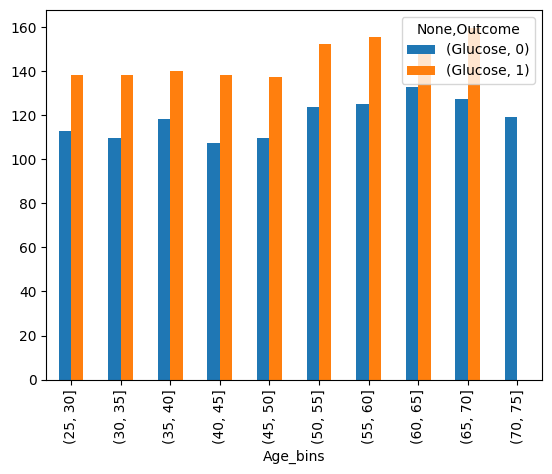

In [31]:
pt1.plot(kind='bar')
plt.show()

#### Inferences:
1. After age of 50 a tremendous hike in glucose is evidshowing ent among both diabetic and non diabetic patients indicating buiding of insulin resistense. .


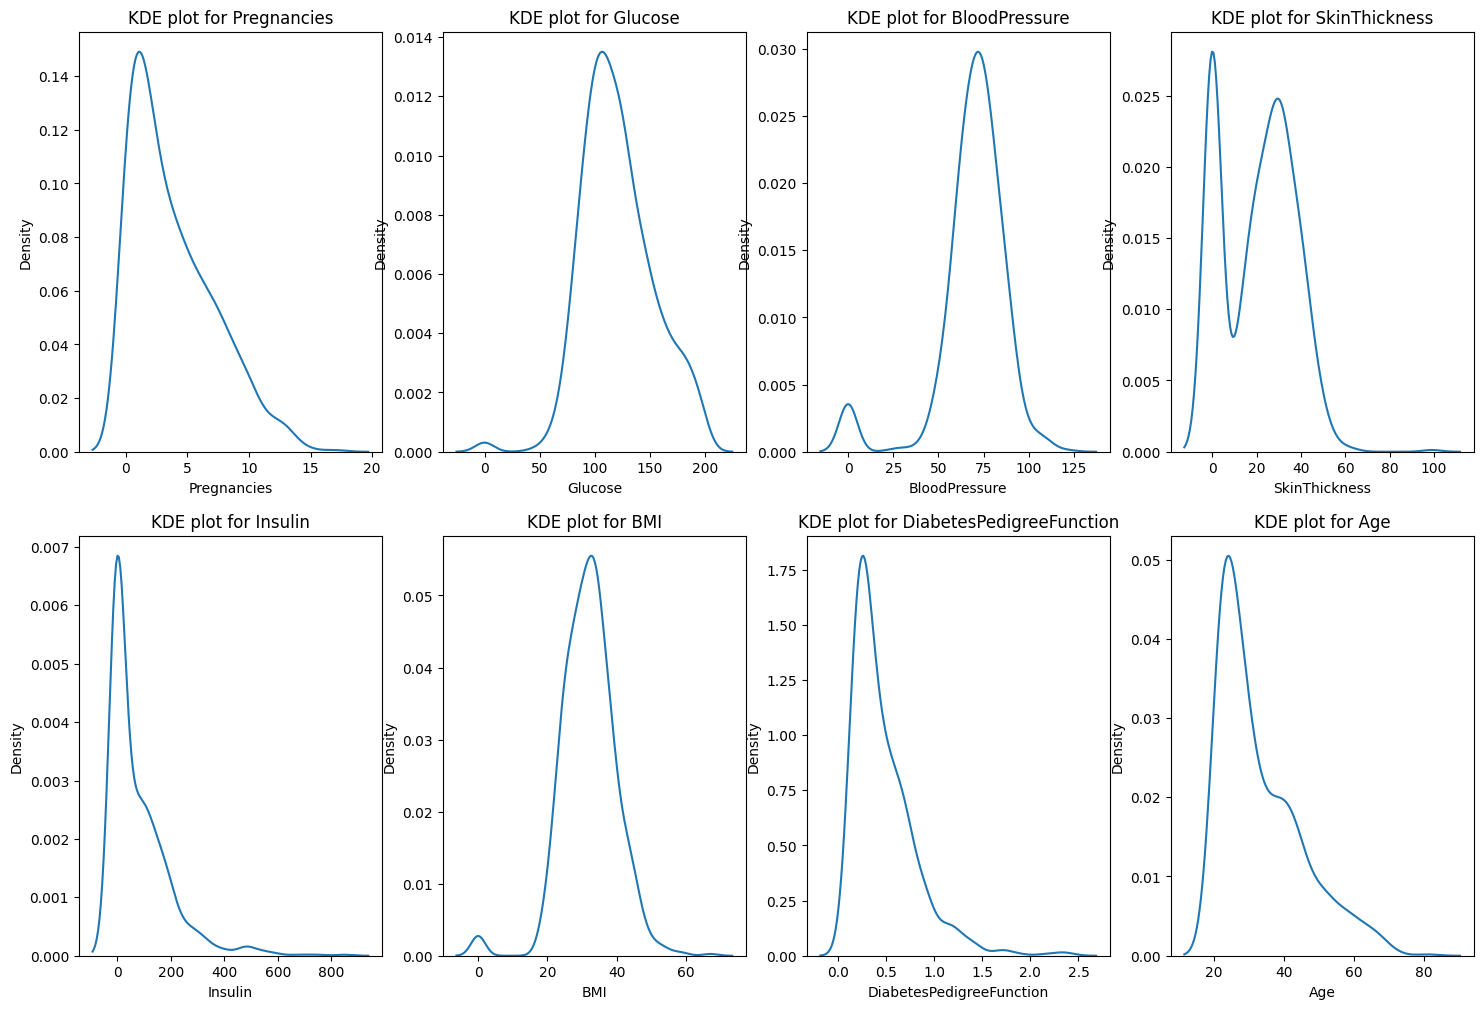

In [33]:
plt.figure(figsize=(18,12))
for i in range(0,len(cont_cols)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=df[cont_cols[i]])
    plt.title(f'KDE plot for {cont_cols[i]}')
plt.show()

### Correlation

In [34]:
df[cont_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


C:\Users\win 8.1\AppData\Local\Temp\ipykernel_19692\3849691348.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


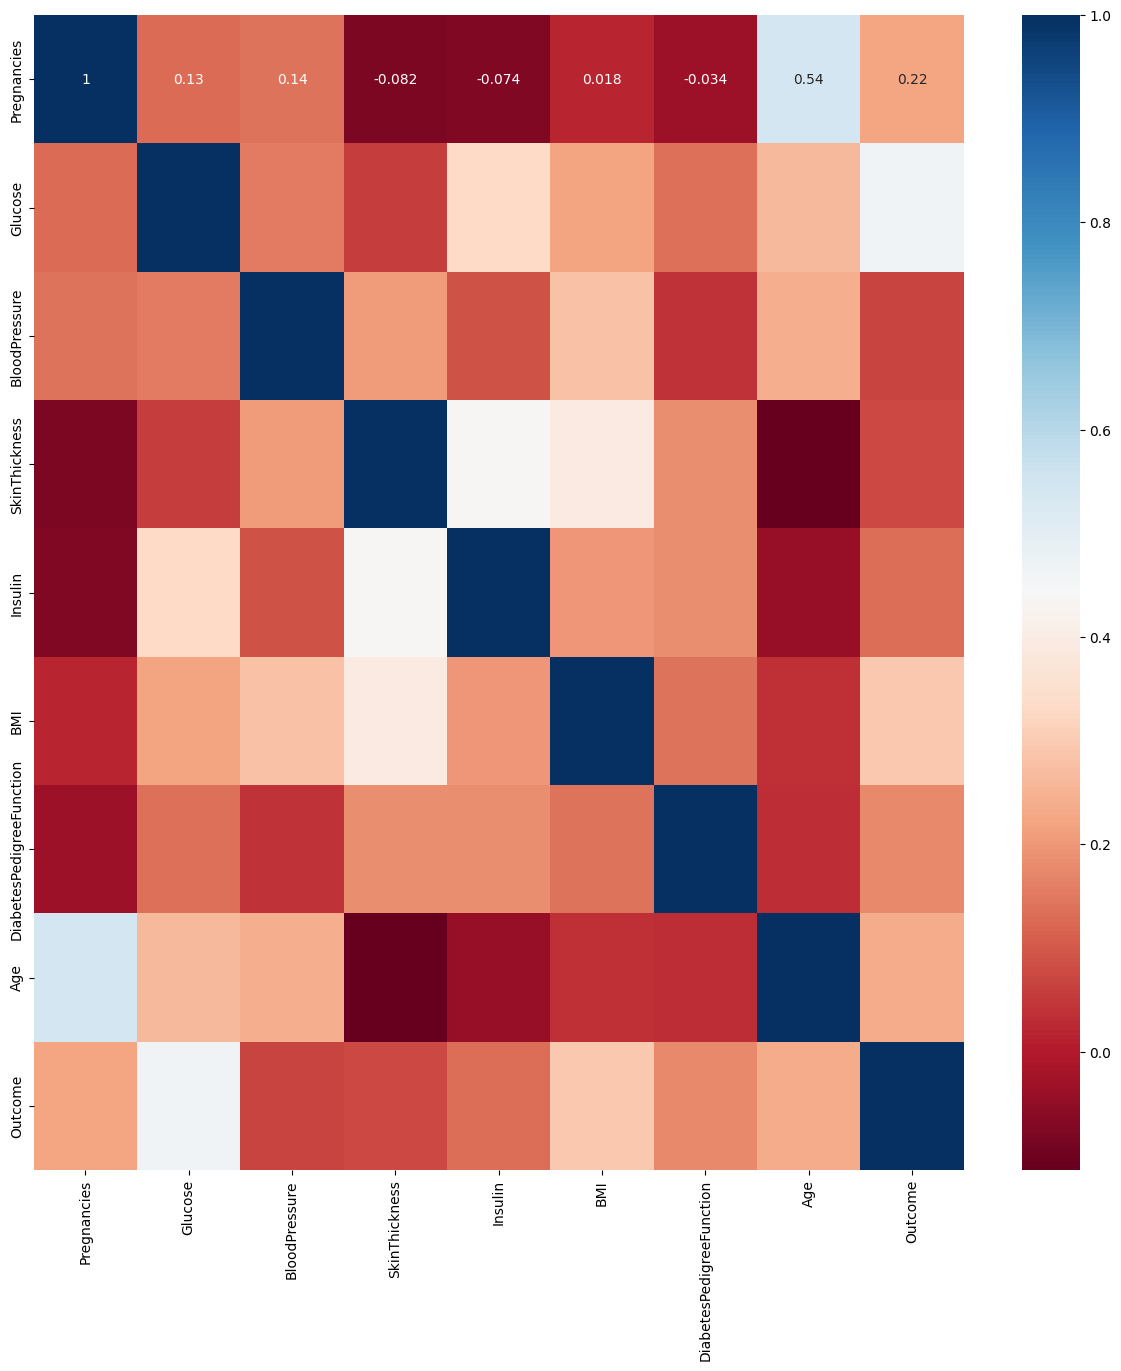

In [35]:
corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Inference
Highly correlated features are not present 

#### Outlier Treatment

In [36]:
a = df[cont_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.988]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,98.8%,max
Pregnancies,0.000,0.00000,0.00000,0.00000,3.0000,10.00000,11.00000,12.00000,13.000000,17.00
Glucose,0.000,57.00000,69.02000,79.00000,117.0000,181.00000,187.99000,192.32000,195.000000,199.00
BloodPressure,0.000,0.00000,0.00000,38.70000,72.0000,90.00000,94.99000,99.32000,105.592000,122.00
SkinThickness,0.000,0.00000,0.00000,0.00000,23.0000,44.00000,46.00000,48.00000,50.000000,99.00
Insulin,0.000,0.00000,0.00000,0.00000,30.5000,293.00000,369.90000,470.94000,495.000000,846.00
BMI,0.000,0.00000,19.16800,21.80000,32.0000,44.39500,46.10000,47.52600,49.679600,67.10
DiabetesPedigreeFunction,0.078,0.09468,0.11902,0.14035,0.3725,1.13285,1.25793,1.39066,1.574704,2.42
Age,21.000,21.00000,21.00000,21.00000,29.0000,58.00000,62.00000,64.66000,66.000000,81.00


In [37]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [38]:
df1 = df.copy()

In [39]:
df[cont_cols] = df[cont_cols].apply(outlier_treatment)

In [40]:
a = df[cont_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Pregnancies,0.00000,0.000000,0.00000,0.00000,3.0000,10.00000,11.00000,12.00000,13.000000,13.00000
Glucose,57.00000,57.000000,69.02000,79.00000,117.0000,181.00000,187.99000,192.32000,196.000000,196.00000
BloodPressure,0.00000,0.000000,0.00000,38.70000,72.0000,90.00000,94.99000,99.32000,106.000000,106.00000
SkinThickness,0.00000,0.000000,0.00000,0.00000,23.0000,44.00000,46.00000,48.00000,51.108900,51.33000
Insulin,0.00000,0.000000,0.00000,0.00000,30.5000,293.00000,369.90000,470.94000,513.267000,519.90000
BMI,0.00000,0.000000,19.16800,21.80000,32.0000,44.39500,46.10000,47.52600,50.250470,50.75900
DiabetesPedigreeFunction,0.09468,0.095564,0.11902,0.14035,0.3725,1.13285,1.25793,1.39066,1.698109,1.69833
Age,21.00000,21.000000,21.00000,21.00000,29.0000,58.00000,62.00000,64.66000,67.000000,67.00000


#### Select x and y

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_bins'],
      dtype='object')

In [42]:
x = df.drop(['Outcome', 'Age_bins'],axis=1)
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


#### Split data into train and test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


#### Function to evalaute model

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score

In [46]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    cr = classification_report(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',cr)

def gen_res(model,xtrain,xtest,ytrain,ytest,ypred,model_name):
    eval_model(ytest,ypred)
    train_acc = model.score(xtrain,ytrain)  # Train Acc
    test_acc = model.score(xtest,ytest)     # Test Acc
    pre1 = precision_score(ytest,ypred)  # pre score = 1
    rec1 = recall_score(ytest,ypred)     # rec score = 1
    res = pd.DataFrame({'Train Acc':train_acc,'Test Acc':test_acc,
                       'Pre1':pre1,'Rec1':rec1},index=[model_name])
    return res

#### Train the model

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#### Model-1 : DT1 

In [48]:
dt1 = DecisionTreeClassifier(criterion='gini',random_state=25)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=25)

In [49]:
ypred_dt1 = dt1.predict(x_test)
dt1_res = gen_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,'DT1(gini)')
dt1_res

Confusion Matrix
 [[109  42]
 [ 29  51]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.55      0.64      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.70       231



,Train Acc,Test Acc,Pre1,Rec1
DT1(gini),1.0,0.692641,0.548387,0.6375


#### Inference
Overfitting exists

In [50]:
from sklearn.tree import plot_tree

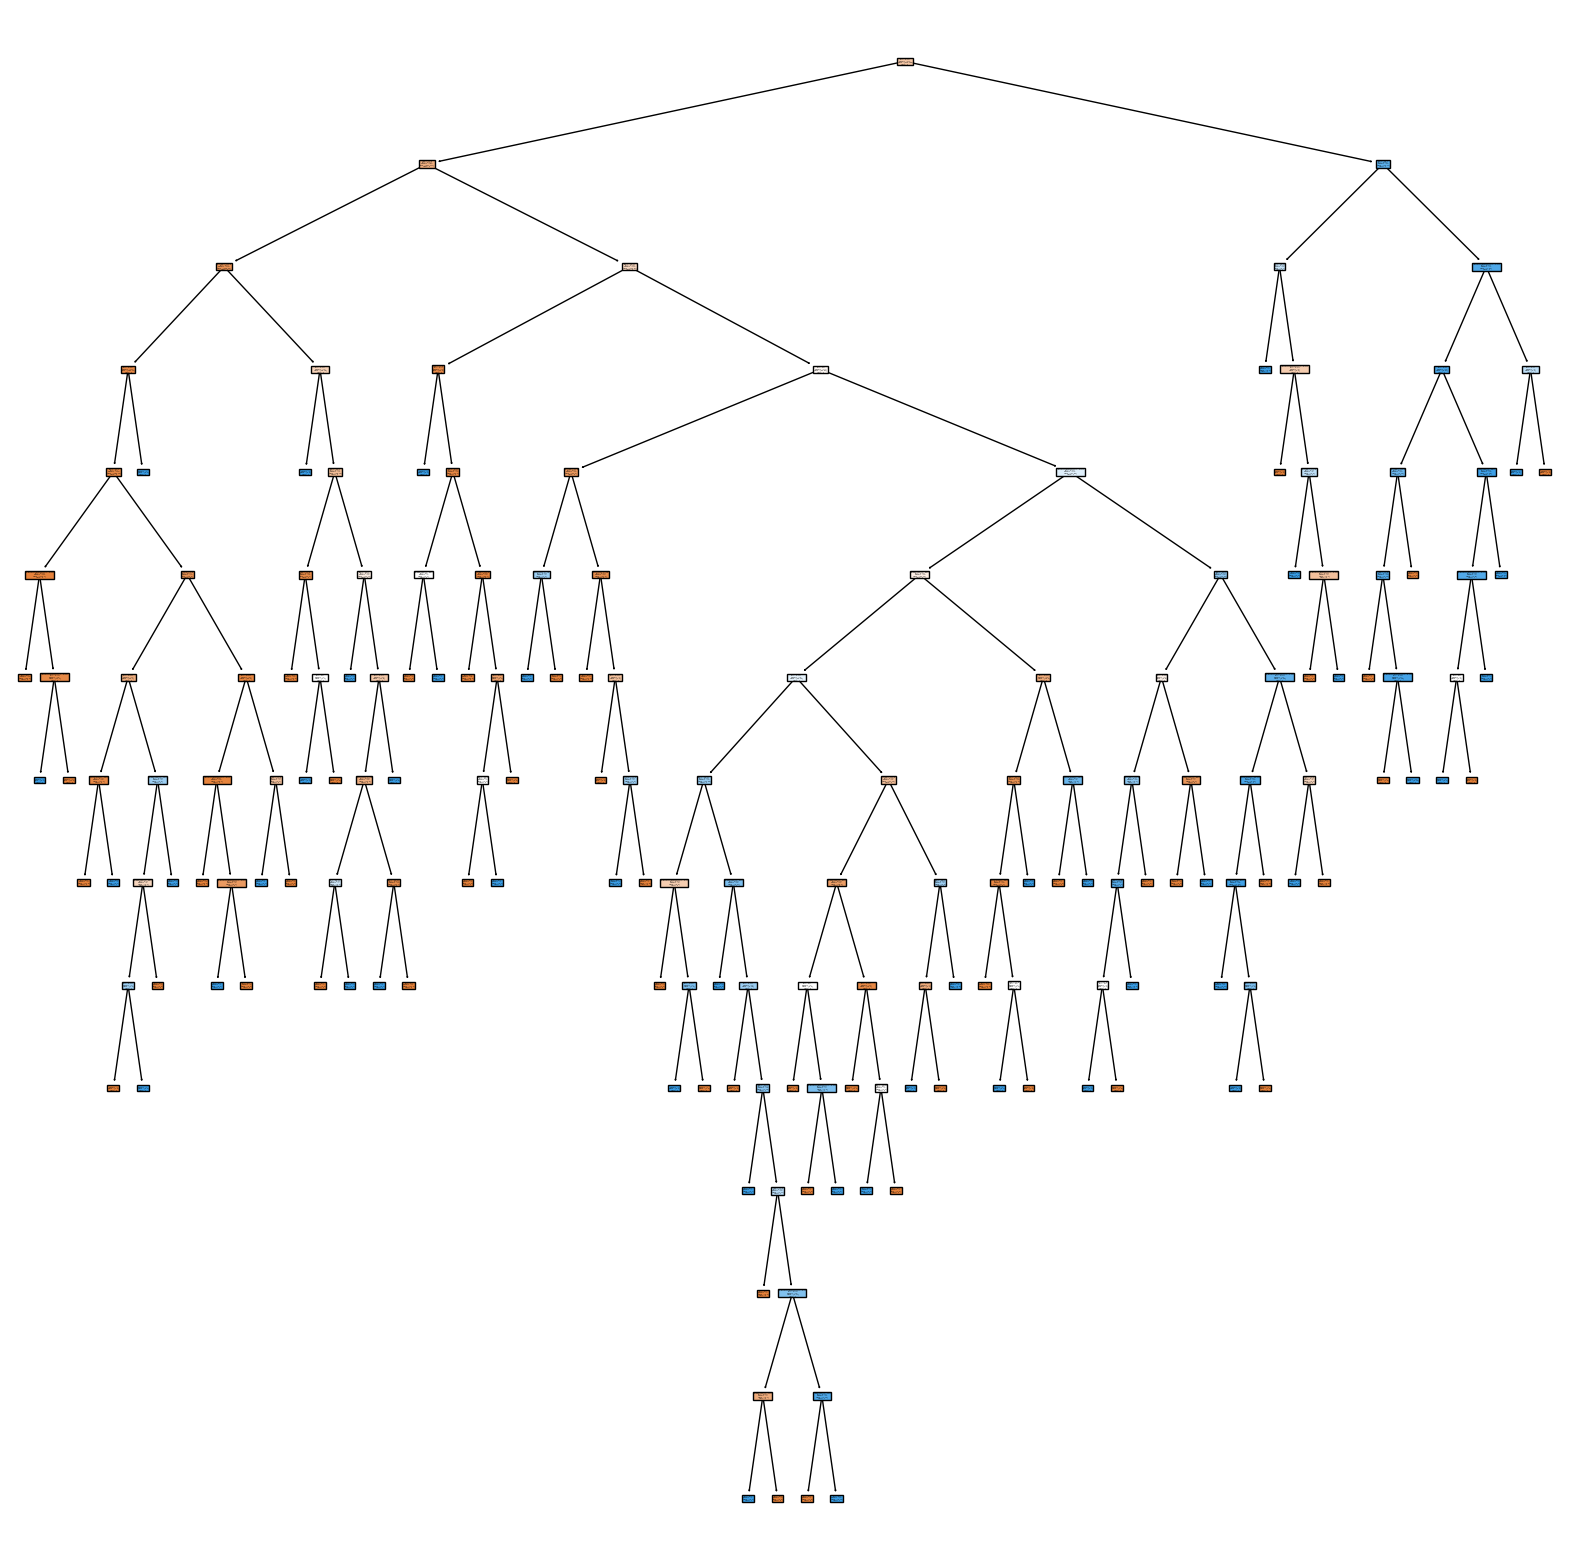

In [51]:
cn = ['0','1']
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=x_train.columns,class_names=cn,filled=True)
plt.show()

#### Model-2 : DT2

In [52]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=10,random_state=25)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=25)

In [53]:
ypred_dt2 = dt2.predict(x_test)
dt2_res =  gen_res(dt2,x_train,x_test,y_train,y_test,ypred_dt2,'DT2(gini,md=6,mss=10)')
dt2_res

Confusion Matrix
 [[110  41]
 [ 29  51]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       151
           1       0.55      0.64      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



,Train Acc,Test Acc,Pre1,Rec1
"DT2(gini,md=6,mss=15)",0.837989,0.69697,0.554348,0.6375


#### Model-3 : DT3

In [54]:
dt3 = DecisionTreeClassifier(criterion='entropy',max_depth=10,
                             min_samples_split=20,random_state=25)
dt3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       random_state=25)

In [81]:
ypred_dt3 = dt3.predict(x_test)
dt3_res =  gen_res(dt3,x_train,x_test,y_train,y_test,ypred_dt2,'DT3(gini,md=10,mss=20)')
dt3_res

Confusion Matrix
 [[110  41]
 [ 29  51]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       151
           1       0.55      0.64      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



,Train Acc,Test Acc,Pre1,Rec1
"DT3(gini,md=10,mss=20)",0.86406,0.718615,0.554348,0.6375


#### Inference
By changing the hyperparameters(criterion,max_depth,min_samples_split), the performace of the model changes. So we need to tune the hyperparameters

#### HyperParameter Tuning

1) GridSearchCV<br>
a) It consumes a lot of time. Time inefficient.<br>
b) It works on all combination of hyperparameters and then it returns the best set of hyperparemeters that generated the best results on different splits.

2) RandomizedSearchCV<br>
a) It consumes a comparatively less time. Time efficient.<br>
b) It works on all random subset of hyperparameters and then it returns the best set of hyperparemeters that generated the best results.

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
hparams = {'criterion':['gini','entropy'],
          'max_depth':[8,9,10,11],
          'min_samples_split':[15,20,22,25]}

# 2 * 4 * 4 = 32

#### GridSearchCV

In [62]:
dt_model = DecisionTreeClassifier(random_state=0)

gs1 = GridSearchCV(dt_model,param_grid=hparams,scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 11],
                         'min_samples_split': [15, 20, 22, 25]},
             scoring='accuracy')

In [63]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 22}
DecisionTreeClassifier(max_depth=10, min_samples_split=22, random_state=0)
0.7466424368293527


#### Analysis of Grid SearchCV Results

In [64]:
gs1_res = pd.DataFrame(gs1.cv_results_)
gs1_res.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008980,0.003364,0.002066,0.001386,gini,8,15,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.731481,0.750000,0.757009,0.757009,0.663551,0.731810,0.035384,27
1,0.006252,0.006362,0.001799,0.000979,gini,8,20,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.750000,0.796296,0.728972,0.757009,0.672897,0.741035,0.040442,19


In [65]:
print(gs1_res.shape)
print(gs1_res.columns)

(32, 16)
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [66]:
gs1_res = gs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','params',
                  'mean_test_score','rank_test_score']]
gs1_res.head()

,param_criterion,param_max_depth,param_min_samples_split,params,mean_test_score,rank_test_score
0,gini,8,15,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.731810,27
1,gini,8,20,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.741035,19
2,gini,8,22,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.742904,13
3,gini,8,25,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.741018,20
4,gini,9,15,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.735549,25


In [67]:
gs1_res.sort_values('rank_test_score').head()  # asc order or rank

,param_criterion,param_max_depth,param_min_samples_split,params,mean_test_score,rank_test_score
10,gini,10,22,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.746642,1
14,gini,11,22,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",0.746642,1
25,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.744877,3
26,entropy,10,22,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.744843,4
5,gini,9,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.744773,5


In [68]:
print(gs1.best_params_)
# {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
# {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 22}


### Model 4 : DT4 (based on GridSearchCV Results)

In [69]:
dt4 = DecisionTreeClassifier(**gs1.best_params_)
dt4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=22)

In [80]:
ypred_dt4 = dt4.predict(x_test)
dt4_res = gen_res(dt4,x_train,x_test,y_train,y_test,ypred_dt4,'DT4_GS1(gini,md=10,mss=22)')
dt4_res

Confusion Matrix
 [[112  39]
 [ 29  51]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



,Train Acc,Test Acc,Pre1,Rec1
"DT4_GS1(gini,md=10,mss=22)",0.886406,0.705628,0.566667,0.6375


#### Randomized SearchCV

In [71]:
dt_model1 = DecisionTreeClassifier(random_state=0)
rs1 = RandomizedSearchCV(dt_model1,param_distributions=hparams,scoring='accuracy',cv=5,
                        n_iter=20)  
# n_iter = number of random cobintaion to select best hparams from
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 9, 10, 11],
                                        'min_samples_split': [15, 20, 22, 25]},
                   scoring='accuracy')

In [72]:
print(rs1.best_params_)
print(rs1.best_estimator_)
print(rs1.best_score_)

{'min_samples_split': 22, 'max_depth': 11, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=11, min_samples_split=22, random_state=0)
0.7466424368293527


In [73]:
rs1_res = pd.DataFrame(rs1.cv_results_)
print(rs1_res.shape)

(20, 16)


### Logestic Regression Reg

In [74]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [82]:
ypred_lr1 = lr1.predict(x_test)
lr1_res = gen_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LogReg(at threshold=0.5)')

Confusion Matrix
 [[120  31]
 [ 30  50]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [83]:
model_res = pd.concat([dt1_res,dt2_res,dt3_res,dt4_res,lr1_res])
model_res

,Train Acc,Test Acc,Pre1,Rec1
DT1(gini),1.000000,0.692641,0.548387,0.6375
"DT2(gini,md=6,mss=15)",0.837989,0.696970,0.554348,0.6375
"DT3(gini,md=10,mss=20)",0.864060,0.718615,0.554348,0.6375
"DT4_GS1(gini,md=10,mss=22)",0.886406,0.705628,0.566667,0.6375
LogReg(at threshold=0.5),0.787709,0.735931,0.617284,0.6250


In [84]:
print(ypred_lr1[:7])

[0 0 0 0 1 0 0]


In [85]:
from collections import Counter

In [86]:
print(Counter(y_test))
print(Counter(ypred_lr1))

Counter({0: 151, 1: 80})
Counter({0: 150, 1: 81})


In [87]:
ypred_prob = lr1.predict_proba(x_test)
ypred_prob[:7]

array([[0.74523542, 0.25476458],
       [0.81380271, 0.18619729],
       [0.88413607, 0.11586393],
       [0.86307712, 0.13692288],
       [0.49279184, 0.50720816],
       [0.5558228 , 0.4441772 ],
       [0.98851245, 0.01148755]])

In [88]:
from sklearn.metrics import roc_auc_score,roc_curve

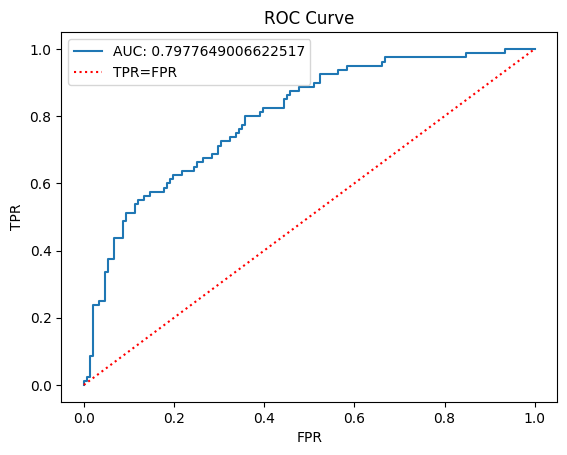

In [89]:
fpr,tpr,thresh = roc_curve(y_test,ypred_prob[:,1])   # ROC curve
auc_score = roc_auc_score(y_test,ypred_prob[:,1])    # AUC_score
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='red',linestyle='dotted',label='TPR=FPR')
plt.title('ROC Curve')
plt.xlabel('FPR')  # FP/(TN+FP)
plt.ylabel('TPR')  # TP/(TP+FN)
plt.legend()
plt.show()


In [90]:
print(len(thresh))
print(thresh)

89
[1.96881391 0.96881391 0.96860686 0.96442536 0.92093407 0.89650448
 0.89521527 0.83173868 0.8198793  0.81546155 0.81396697 0.78440072
 0.78145972 0.76525833 0.76388141 0.72376563 0.68892655 0.67136937
 0.66719663 0.6660234  0.64440928 0.63431059 0.62927243 0.62902754
 0.61536005 0.61059385 0.59724658 0.59216721 0.54410438 0.53764129
 0.527425   0.52456184 0.52375435 0.52252841 0.51963301 0.51110323
 0.47964227 0.46888283 0.42501636 0.42238628 0.42093033 0.39773673
 0.39467686 0.39086841 0.35888336 0.35451767 0.35039655 0.34352689
 0.33735942 0.33309661 0.31605668 0.31472408 0.30590853 0.30138273
 0.29893604 0.29102869 0.28996122 0.27168004 0.27059411 0.26196212
 0.25523813 0.25478572 0.25476458 0.25456667 0.23306517 0.22732781
 0.22625731 0.22153925 0.21731029 0.21672908 0.20473432 0.19965939
 0.17719553 0.17149037 0.15782293 0.15510836 0.13419347 0.13240101
 0.11586393 0.1141886  0.10277541 0.09819638 0.09502948 0.09275297
 0.05551583 0.05544609 0.02807519 0.02627662 0.0025315 ]


#### Best Threshhold

In [91]:
best_thresh1 = thresh[np.argmax(abs(tpr-fpr))]
print(best_thresh1)

0.26196212250220663


#### Generate Predictions at best threhsold

In [92]:
ypred_lr2 = np.where(ypred_prob[:,1]>best_thresh1,1,0)
print(ypred_lr2)

[0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 1 0 1 0 0]


In [98]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)  
pre_lr2 = precision_score(y_test,ypred_lr2)  # pre_score for 1
rec_lr2 = recall_score(y_test,ypred_lr2)     # rec_score for 1

lr2_res = pd.DataFrame({'Pre1':pre_lr2,'Rec1':rec_lr2,'Test Acc':acc_lr2},
                       index=[f'LogReg(th={round(best_thresh1,3)})'])
lr2_res

,Pre1,Rec1,Test Acc
LogReg(th=0.262),0.538462,0.7875,0.692641


In [94]:
# Recall has increased

In [99]:
res = pd.concat([model_res,lr2_res])
res

,Train Acc,Test Acc,Pre1,Rec1
DT1(gini),1.000000,0.692641,0.548387,0.6375
"DT2(gini,md=6,mss=15)",0.837989,0.696970,0.554348,0.6375
"DT3(gini,md=10,mss=20)",0.864060,0.718615,0.554348,0.6375
"DT4_GS1(gini,md=10,mss=22)",0.886406,0.705628,0.566667,0.6375
LogReg(at threshold=0.5),0.787709,0.735931,0.617284,0.6250
LogReg(th=0.262),NaN,0.692641,0.538462,0.7875


In [ ]:
# In diabetes detection our main focus shoud be in elimination false negatives so we can go with either of 
# the two logistc Regression results depending on the need to baalnce precion and recall.

#### Saving the Model

In [100]:
import pickle

In [101]:
pickle.dump(lr1,open('Diabetes.pkl','wb'))  # write binary

In [102]:
model = pickle.load(open('Diabetes.pkl','rb'))
